In [1]:
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

display(HTML("<style>.container {width:80% !important;}<style>"))
display(HTML("<style>.container {font-size:14px;}<style>"))

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew
import pandas as pd
import numpy as np
import itertools
from collections import defaultdict

import os
print(os.listdir("../Absenteeism"))

['Absenteeism Carcamo Acosta.ipynb', 'RandomForest.ipynb', 'Absenteeism_at_work_classification_test.csv', 'predictions.csv', '.ipynb_checkpoints', 'Absenteeism_at_work_classification_training.csv', 'FinalAcostaCarcamo.ipynb']


# Absenteeism at Work
***

Patricia Carcamo Acosta <br>
February 23, 2020
***

The [US Bureau of Labor Statistics](https://www.bls.gov/cps/cpsaat47.htm) defines absenses as "instances when persons who usually work 35 or more hours per week (full time) worked less than 35 hours during the reference week for one of the following reasons: own illness, injury, or medical problems; child care problems; other family or personal obligations; civic or military duty; and maternity or paternity leave". It does not include absenses due to scheduled personal or holiday leave. The absence rate is the ratio of workers with absences to total full-time wage and salary employment. In the most recent January 2020 release, the average absence rate for all occupations in 2019 was 2.8% which represents roughly 328,000 absences from work for full time wage and salary workers. This is especially important in industries that have absenteeism rates above the average such as the case of Healthcare and Social Assitance (3.5%) in the private sector, and Federal Government (3.8%) and State Government (3.5%) in the public sector.  

Absenteeism impacts lost wages, loss of productivity, employee morale, and overworking of staff. This is an important issue to analyze for its impact in both the private and public sector. 

I will further explore this classification problem with a machine learning model that will analyze the features that contribute to absenteeism for a company's 593 employees. The target is to predict beforehand prolonged absences greater than 5 hours, thus adding value to the company's bottomline and its efforts to better understand and reduce absenteeism in the workplace.  

<br>


## 1. READ DATA
***

First, read the files. The training data is the one I will use to generate the model that will predict the variable `Absenteeism`. The test set will be used to validate the model's performance. 
<br>

In [2]:
train = pd.read_csv("Absenteeism_at_work_classification_training.csv", delimiter = ";", decimal = ".")
test = pd.read_csv("Absenteeism_at_work_classification_test.csv", delimiter = ";", decimal = ".")


## 2. EDA: Exploratory Data Analysis
***
In this step, I will inspect the structure of the dataframe and datatypes of the features. The **training** dataset contains **593 observations and 22 features** including a column for the target variable, while the **test** dataset contains **147 observations and 21 features**.

In [3]:
train.info()
test.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 1 to 740
Data columns (total 22 columns):
ID                                 593 non-null int64
Reason.for.absence                 593 non-null int64
Month.of.absence                   593 non-null int64
Day.of.the.week                    593 non-null int64
Seasons                            593 non-null int64
Transportation.expense             593 non-null int64
Distance.from.Residence.to.Work    593 non-null int64
Service.time                       593 non-null int64
Age                                593 non-null int64
Work.load.Average.day              593 non-null float64
Hit.target                         593 non-null int64
Disciplinary.failure               593 non-null int64
Education                          593 non-null int64
Son                                593 non-null int64
Social.drinker                     593 non-null int64
Social.smoker                      593 non-null int64
Pet                          

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,...,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,ID.Worker,Absenteeism
1,1,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,11,False
2,2,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,36,False
3,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,3,False
4,4,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,7,False
5,5,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,11,False


In [4]:
train.describe()

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,...,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,ID.Worker
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,375.227656,19.065767,6.283305,3.919056,2.561551,222.198988,29.971332,12.622260,36.424958,271.806185,...,0.050590,1.295110,1.016863,0.556492,0.070826,0.720067,78.487352,171.949410,26.539629,18.084317
std,213.600103,8.525442,3.400220,1.410694,1.104355,65.306897,14.626343,4.361492,6.527348,39.633244,...,0.219344,0.677031,1.108803,0.497218,0.256751,1.217504,12.882536,5.872014,4.278584,10.877526
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,1.000000
25%,190.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,68.000000,169.000000,23.000000,10.000000
50%,383.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,170.000000,25.000000,19.000000
75%,558.000000,27.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,28.000000
max,740.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,36.000000


The features of this dataset are defined as follows:
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

>1. Certain infectious and parasitic diseases
>2. Neoplasms
>3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
>4. Endocrine, nutritional and metabolic diseases
>5. Mental and behavioural disorders
>6. Diseases of the nervous system
>7. Diseases of the eye and adnexa
>8. Diseases of the ear and mastoid process
>9. Diseases of the circulatory system
>10. Diseases of the respiratory system
>11. Diseases of the digestive system
>12. Diseases of the skin and subcutaneous tissue
>13. Diseases of the musculoskeletal system and connective tissue
>14. Diseases of the genitourinary system
>15. Pregnancy, childbirth and the puerperium
>16. Certain conditions originating in the perinatal period
>17. Congenital malformations, deformations and chromosomal abnormalities
>18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
>19. Injury, poisoning and certain other consequences of external causes
>20. External causes of morbidity and mortality
>21. Factors influencing health status and contact with health services.
>22. Patient follow-up
>23. Medical consultation
>24. Blood donation
>25. Laboratory examination
>26. Unjustified absence
>27. Physiotherapy
>28. Dental consultation

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism (target)

## 3. Data Cleaning
***

**Mislabeled Data** <br/>
Two rows have value of zero in the Month.of.absence column. When inspecting the contents, the values of the corresponding seasons are labeled Autumn and Winter. Therefore, I will impute the missing months as 10 for October and 12 for December for rows 739 and 740 respectively. 

In [5]:
train[train["Month.of.absence"]==0]

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,...,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,ID.Worker,Absenteeism
739,739,0,0,4,2,231,35,14,39,271.219,...,1,2,1,0,2,100,170,35,8,False
740,740,0,0,6,3,179,45,14,53,271.219,...,1,1,0,0,1,77,175,25,35,False


In [6]:
train.loc[train.ID == 739, 'Month.of.absence'] = 10
train.loc[train.ID == 740, 'Month.of.absence'] = 12

In [7]:
train[train["Month.of.absence"]==0]

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,...,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,ID.Worker,Absenteeism


<br/>

**Missing Values and Duplicates**<br/>
The dataset does not contain null-values or duplicates, but the categorical variables need to be reassigned from numerical data type. I will assign these values to the train and test sets so I can do a separate visual exploratory data analysis on the train set.

In [8]:
train.isnull().sum()
test.isnull().sum()

ID                                 0
Reason.for.absence                 0
Month.of.absence                   0
Day.of.the.week                    0
Seasons                            0
Transportation.expense             0
Distance.from.Residence.to.Work    0
Service.time                       0
Age                                0
Work.load.Average.day              0
Hit.target                         0
Disciplinary.failure               0
Education                          0
Son                                0
Social.drinker                     0
Social.smoker                      0
Pet                                0
Weight                             0
Height                             0
Body.mass.index                    0
ID.Worker                          0
Absenteeism                        0
dtype: int64

ID                                 0
Reason.for.absence                 0
Month.of.absence                   0
Day.of.the.week                    0
Seasons                            0
Transportation.expense             0
Distance.from.Residence.to.Work    0
Service.time                       0
Age                                0
Work.load.Average.day              0
Hit.target                         0
Disciplinary.failure               0
Education                          0
Son                                0
Social.drinker                     0
Social.smoker                      0
Pet                                0
Weight                             0
Height                             0
Body.mass.index                    0
ID.Worker                          0
dtype: int64

In [9]:
train['ID'].duplicated().any()

False

<br/>

**Variable Factorization**<br/>
For the train and test datasets, I will reasign the variable type for the columns ID, ID.Worker, Reason.for.absence, Day.of.the.week, Month.of.absence,Seasons, Disciplinary.failure, Social.drinker, Social.smoker. In the case of the train set I will also reclassify the target variable Absenteeism. The variable Reason.for.absence will be further explored below. 

In [10]:
categorical_columns = ["ID", "ID.Worker", "Reason.for.absence", "Day.of.the.week", "Month.of.absence","Seasons", "Disciplinary.failure", "Social.drinker", "Social.smoker", "Absenteeism"]
categorical_columns2 = ["ID", "ID.Worker", "Reason.for.absence", "Day.of.the.week", "Month.of.absence","Seasons", "Disciplinary.failure", "Social.drinker", "Social.smoker"]
train[categorical_columns] = train[categorical_columns].astype("category")
test[categorical_columns2] = test[categorical_columns2].astype("category")
train.Absenteeism = train.Absenteeism.astype(int)
train.dtypes
test.dtypes
train.shape
test.shape

ID                                 category
Reason.for.absence                 category
Month.of.absence                   category
Day.of.the.week                    category
Seasons                            category
Transportation.expense                int64
Distance.from.Residence.to.Work       int64
Service.time                          int64
Age                                   int64
Work.load.Average.day               float64
Hit.target                            int64
Disciplinary.failure               category
Education                             int64
Son                                   int64
Social.drinker                     category
Social.smoker                      category
Pet                                   int64
Weight                                int64
Height                                int64
Body.mass.index                       int64
ID.Worker                          category
Absenteeism                           int64
dtype: object

ID                                 category
Reason.for.absence                 category
Month.of.absence                   category
Day.of.the.week                    category
Seasons                            category
Transportation.expense                int64
Distance.from.Residence.to.Work       int64
Service.time                          int64
Age                                   int64
Work.load.Average.day               float64
Hit.target                            int64
Disciplinary.failure               category
Education                             int64
Son                                   int64
Social.drinker                     category
Social.smoker                      category
Pet                                   int64
Weight                                int64
Height                                int64
Body.mass.index                       int64
ID.Worker                          category
dtype: object

(593, 22)

(147, 21)

## 4. Visual Exploratory Data Analysis (Visual EDA)
***
I will explore the distribution of the numerical features in our train data by plotting their histograms and the values of the categorical data by plotting their countplots. 
First, let's look at the target variable Absenteeism.

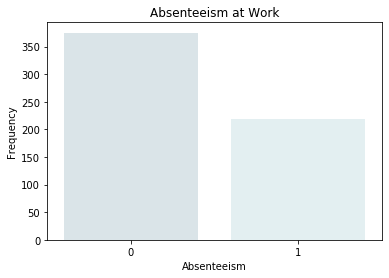

In [11]:
sns.countplot(train["Absenteeism"], palette="GnBu_d", alpha=0.2);
plt.ylabel('Frequency')
plt.title('Absenteeism at Work')
plt.show(); 


Throught the visual representation of the distribution of the variables, I can easily identify the different scales used to measure the variables. In order to prevent numeric features on larger scales from undully influencing the model, these will need to be rescaled. 

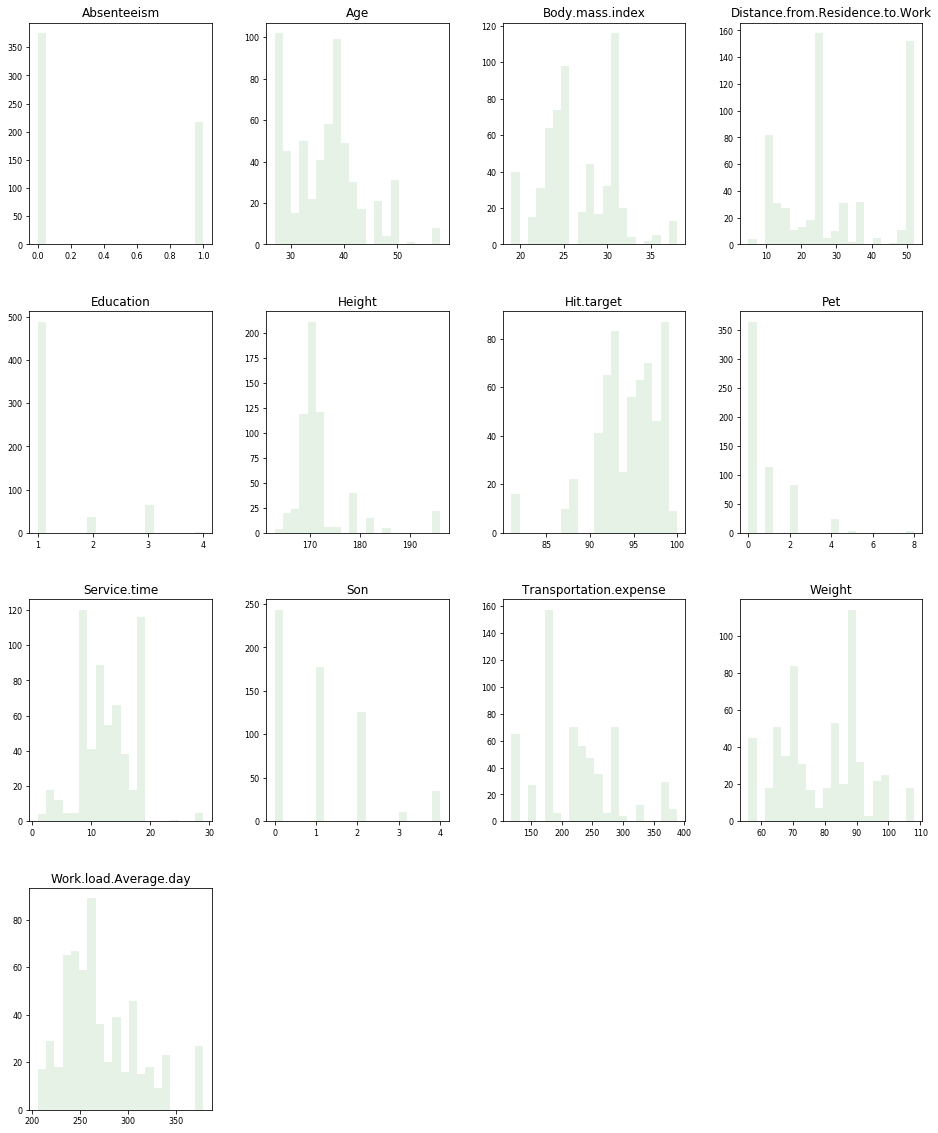

In [12]:
list(set(train.dtypes.tolist()))
df_num = train.select_dtypes(include = ['int64', 'float64'])
df_num.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8, grid=False, color="g", alpha=0.1); 

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


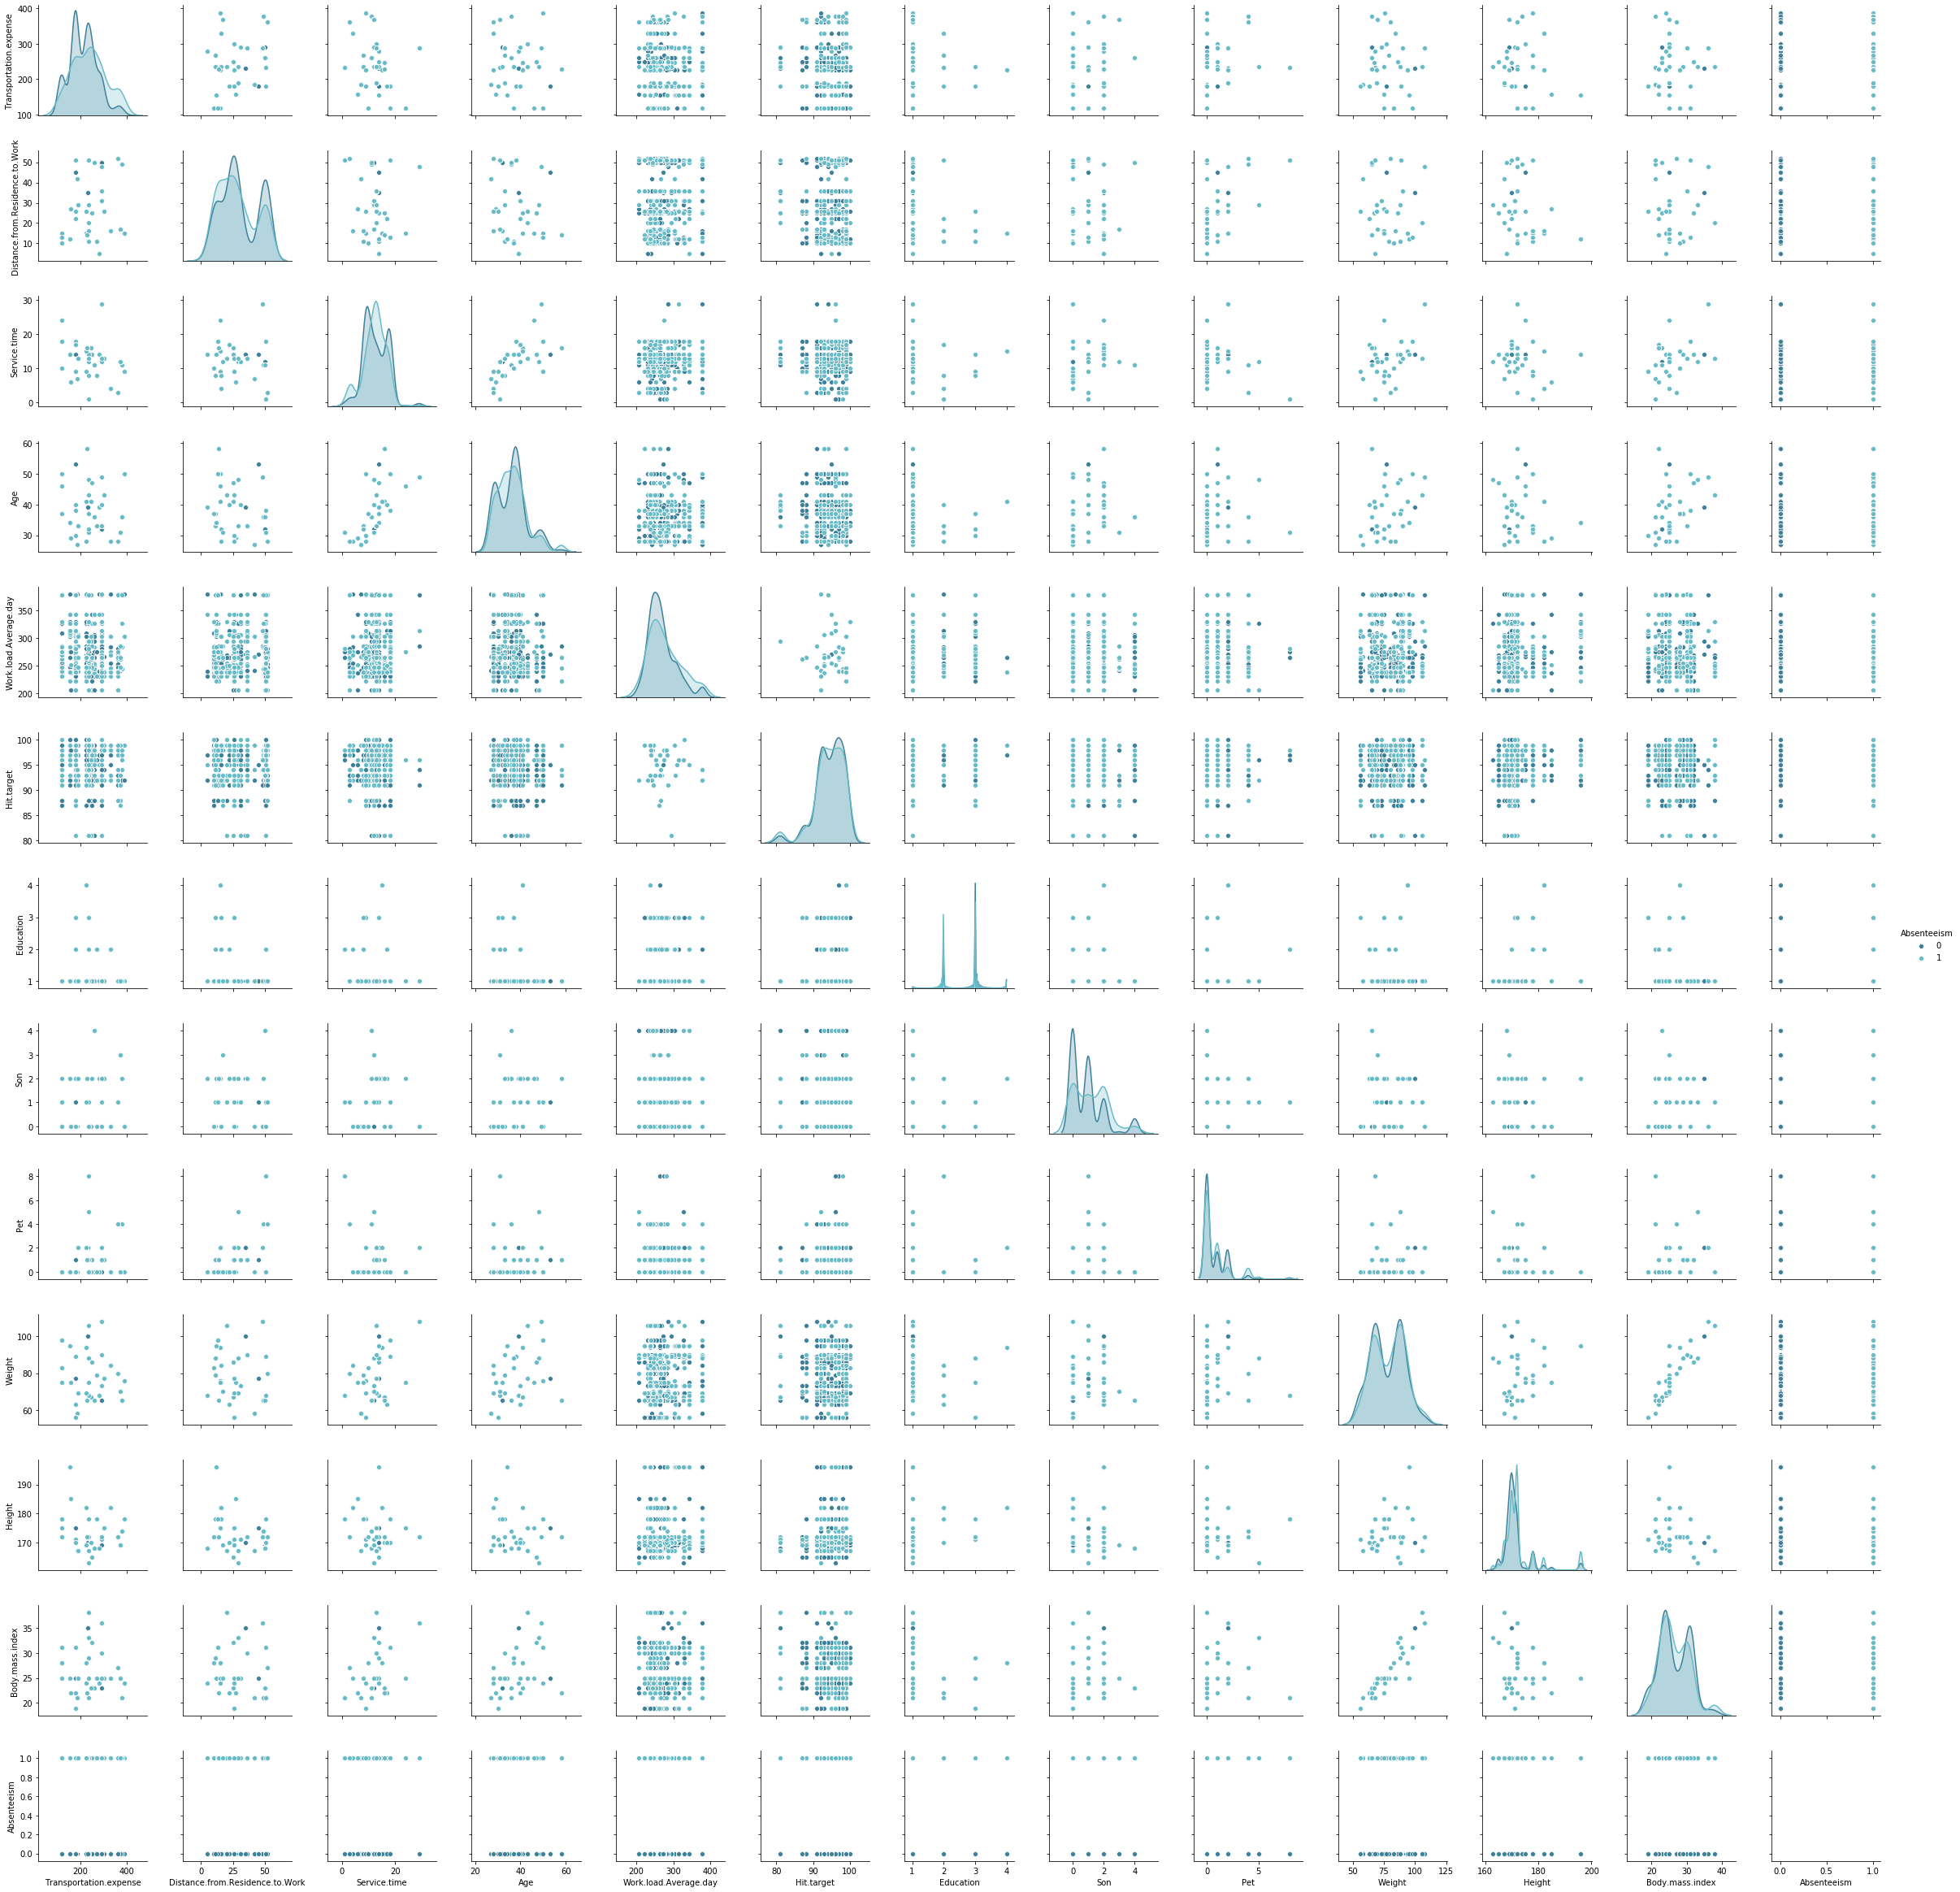

In [13]:
for_pairplot = ["Transportation.expense","Distance.from.Residence.to.Work","Service.time","Age","Work.load.Average.day","Hit.target","Education","Son","Pet","Weight","Height","Body.mass.index","Absenteeism"]
train_pairplot = train[for_pairplot]

sns.pairplot(train_pairplot, hue="Absenteeism", palette="GnBu_d");

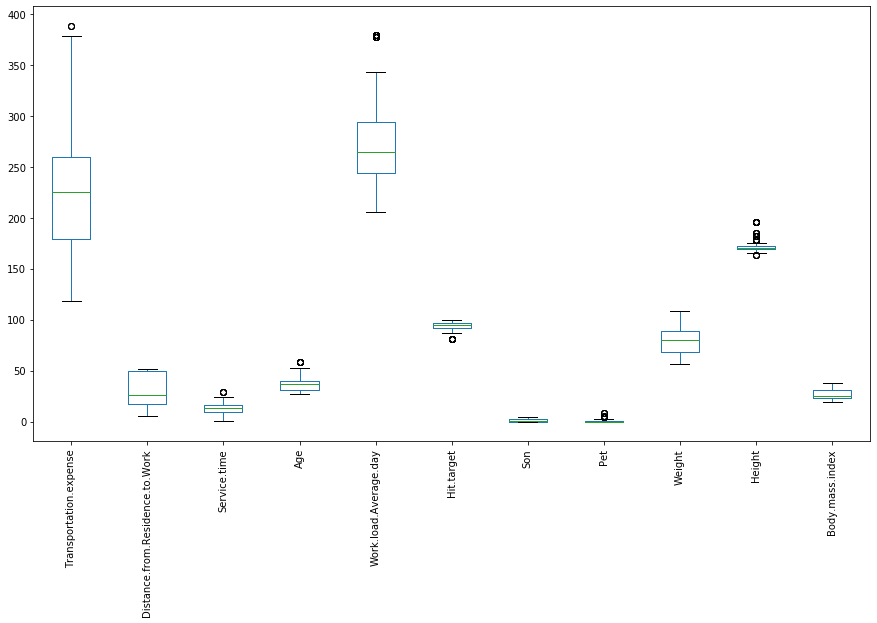

In [14]:
for_boxplot = ["Month.of.absence", "Transportation.expense","Distance.from.Residence.to.Work","Service.time","Age","Work.load.Average.day","Hit.target","Son","Pet","Weight","Height","Body.mass.index"]
train_boxplot = train[for_boxplot]
train_boxplot.boxplot(figsize=(15,8),grid=False, rot=90);

The boxplot allows me to quickly identify the outliers in the dataset. Outliers are present in the features Transportation.expense, Service.time, Age, Work.load.Average.Day, Hit.target, Pet, and Height. These will be further analyzed next. 

<br/>

## 5. OUTLIER ANALYSIS 
***
<br/>
Given that the training dataset has less than 600 observations, I consider it is important to handle outliers instead of removing them from the dataset. I will analyze the makeup of the values that are outside of the interquartile range(IQR) and the percentage this represents to our target variable to determine how to address them. 

#### 1. Transportation expense: 
   * **130** employees spent over the 75th percentile amount of USD 260 with the maximum being USD 388. Of those 71 employees missed work which represents almost **55%**. Outlier values will be replaced with value of 75th percentile: USD 260. 

#### 2. Service Time:
   * **140** employees have worked longer than 16 years. Of those, **26%** or 36 employees were reported absent mainly due to medical conditions. Outlier values will be replaced with value of 75th percentile: 16 years. 

#### 3. Age
   * **112** employees are over the 75th percentile for age of 40 yrs old with the maximum being 58. Of those, **43%** or 48 employees, were reported absent. Outlier values will be replaced with value of 75th percentile: 40 years.

#### 4. Workload Average Day
   * **138** employees are over the 75th percentile for workload average day of 294.2 with the maximum being almost 379. Of those, **46%** or 64 employees were reported absent. Outlier values will be replaced with value of 75th percentile: 294.

#### 5. Hit Target
   * **89** employees had target scores lower than the 25th percentile of 92, with a minimum of 81. Of those, **38%** or 34 employees were reported absent. Outlier values will be replaced with value of 25th percentile: 92.

#### 6. Pet
   * **115** employees report having more than the 75th percentile of 1 pet, with the maximum being 8 pets. Of those petowners, **32%** or 37 employees were reported absent. Outlier values will be replaced with value of 1 to indicate that the employee is a pet owner. This feature's data type is converted to categorical.

#### 7. Height
   * **89** employees are below the 25th percentile and 94 employees are above the 75th percentile values for height in the dataset. Of those, **41%** or 76 employees were reported absent. There is very little variability on the height feature and my intuition tells me an employee being absent from work has little to do with how tall or short he or she is. The values of the outliers in this feature will be imputed with the mean height of 170.  

In [15]:
train.shape
train.describe()

(593, 22)

,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Education,Son,Pet,Weight,Height,Body.mass.index,Absenteeism
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,222.198988,29.971332,12.622260,36.424958,271.806185,94.537943,1.295110,1.016863,0.720067,78.487352,171.949410,26.539629,0.367622
std,65.306897,14.626343,4.361492,6.527348,39.633244,3.833396,0.677031,1.108803,1.217504,12.882536,5.872014,4.278584,0.482565
min,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,1.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,17.000000,9.000000,31.000000,244.387000,92.000000,1.000000,0.000000,0.000000,68.000000,169.000000,23.000000,0.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,1.000000,1.000000,0.000000,80.000000,170.000000,25.000000,0.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,1.000000,2.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,4.000000,4.000000,8.000000,108.000000,196.000000,38.000000,1.000000


In [16]:
outliersTE = train[train["Transportation.expense"]>260]
len(outliersTE)
len(outliersTE[outliersTE["Absenteeism"]==True])
len(outliersTE[outliersTE["Absenteeism"]==True])/len(outliersTE) * 100

train["Transportation.expense"] = np.where(train["Transportation.expense"] > 260, 260, train['Transportation.expense'])

130

71

54.61538461538461

In [17]:
outliersST = train[train["Service.time"]>16]
len(outliersST)
len(outliersST[outliersST["Absenteeism"]==True])
len(outliersST[outliersST["Absenteeism"]==True]) / len(outliersST) *100

train["Service.time"] = np.where(train["Service.time"] > 16, 16, train['Service.time'])

140

36

25.71428571428571

In [18]:
outliersAge = train[train["Age"]>40]
len(outliersAge)
len(outliersAge[outliersAge["Absenteeism"]==True])
len(outliersAge[outliersAge["Absenteeism"]==True])/len(outliersAge) *100

train["Age"] = np.where(train["Age"] > 40, 40, train['Age'])

112

48

42.857142857142854

In [19]:
outliersWL = train[train["Work.load.Average.day"]>294.217]
len(outliersWL)
len(outliersWL[outliersWL["Absenteeism"]==True])
len(outliersWL[outliersWL["Absenteeism"]==True]) / len(outliersWL) *100

train["Work.load.Average.day"] = np.where(train["Work.load.Average.day"] > 294, 294, train['Work.load.Average.day'])

138

64

46.3768115942029

In [20]:
outliersHT = train[train["Hit.target"]<92]
len(outliersHT)
len(outliersHT[outliersHT["Absenteeism"]==True])
len(outliersHT[outliersHT["Absenteeism"]==True]) / len(outliersHT) *100

train["Hit.target"] = np.where(train["Hit.target"] < 92, 92, train['Hit.target'])

89

34

38.20224719101123

In [21]:
outliersPet = train[train["Pet"]>1]
len(outliersPet)
len(outliersPet[outliersPet["Absenteeism"]==True])
len(outliersPet[outliersPet["Absenteeism"]==True]) / len(outliersPet) *100

train["Pet"] = np.where(train["Pet"] > 1, 1, train['Pet'])
train["Pet"] = train["Pet"].astype("int")

115

37

32.17391304347826

In [22]:
outliersHeight = train[(train.Height<169) | (train.Height>172)]
len(outliersHeight)
len(outliersHeight[outliersHeight["Absenteeism"]==True])
len(outliersHeight[outliersHeight["Absenteeism"]==True]) / len(outliersHeight) * 100

median = float(train['Height'].median())
train["Height"] = np.where(train["Height"] > 172, median, train['Height'])
train["Height"] = np.where(train["Height"] < 169, median, train['Height'])

181

76

41.988950276243095

<br/>

## 6. CORRELATION AMONG FEATURES
***
Looking at the correlation heatmap on the train dataset, I can identify that Age is moderately correlated to Service Time, and Body Mass Index is highly correlated to Weight. Once I run the baseline model I will be able to determine the feature importance of these to determine which features can be removed from the analysis in order to avoid multicolinearity.  

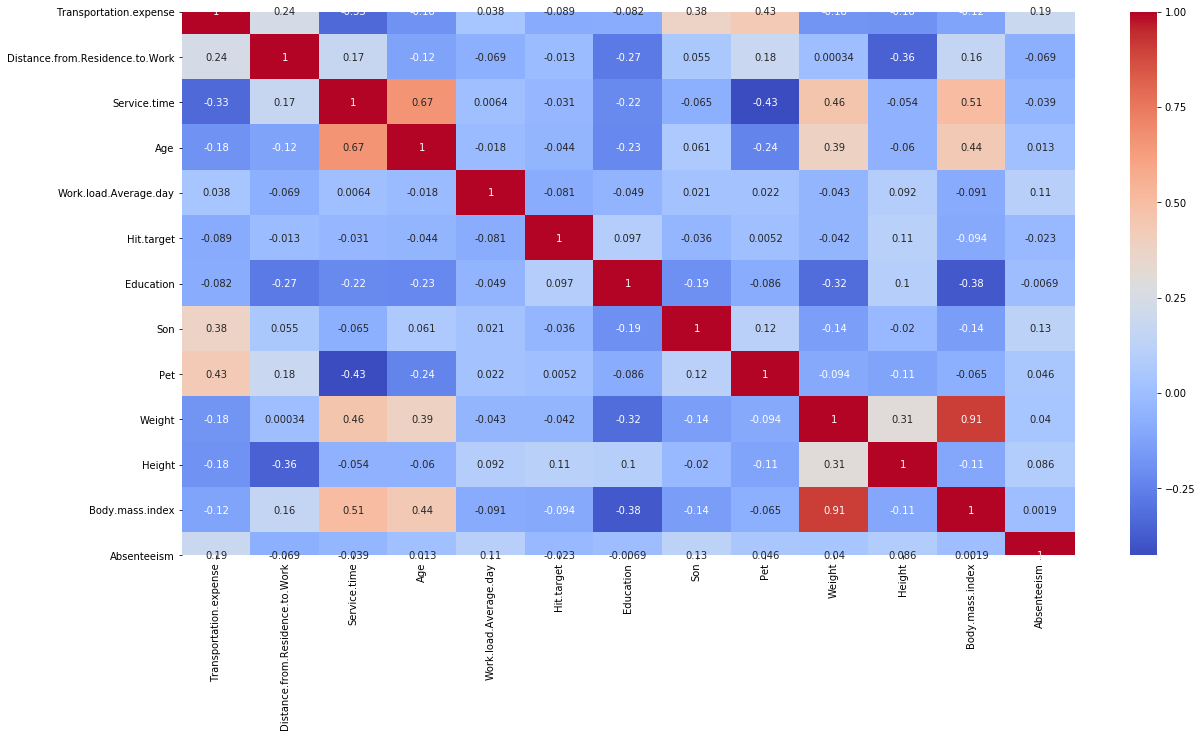

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(), cmap="coolwarm", annot = True)
plt.show();

<br/>

## 7. ADVANCED FACTORIZATION
***

The category names will be assigned for the feature **Reason.for.absence** according to the data dictionary for better understanding of the features. A problem I encoutered is that some categories are present in the train set but not on the test set, if I process these separately the datasets will be imbalanced. At this point I will combine both train and test datasets because categorical features will be "dummified" and numeric features will be scaled and normalized. This will keep the size of train and test sets constant to use as input on the machine learning algorithms I will apply. 

In [24]:
test.loc[:,'Absenteeism'] = 0
dataset = train.append(test)

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 1 to 738
Data columns (total 22 columns):
ID                                 740 non-null int64
Reason.for.absence                 740 non-null int64
Month.of.absence                   740 non-null int64
Day.of.the.week                    740 non-null category
Seasons                            740 non-null category
Transportation.expense             740 non-null int64
Distance.from.Residence.to.Work    740 non-null int64
Service.time                       740 non-null int64
Age                                740 non-null int64
Work.load.Average.day              740 non-null float64
Hit.target                         740 non-null int64
Disciplinary.failure               740 non-null category
Education                          740 non-null int64
Son                                740 non-null int64
Social.drinker                     740 non-null category
Social.smoker                      740 non-null category
Pet           

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,...,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,ID.Worker,Absenteeism
1,1,26,7,3,1,260,36,13,33,239.554,...,1,2,1,0,1,90,172.0,30,11,0
2,2,0,7,3,1,118,13,16,40,239.554,...,1,1,1,0,0,98,170.0,31,36,0
3,3,23,7,4,1,179,51,16,38,239.554,...,1,0,1,0,0,89,170.0,31,3,0
4,4,7,7,5,1,260,5,14,39,239.554,...,1,2,1,1,0,68,170.0,24,7,0
5,5,23,7,5,1,260,36,13,33,239.554,...,1,2,1,0,1,90,172.0,30,11,0


The features **Son** and **Pet** will be changed from numeric to categoric by assigning any values >1 to 1 and then converted to a category in the next step. 
<br/>

I will also categorize **Month.of.absence**, **Education**, and **Reason.for.absence**
<br/>

A new feature **Commute.ratio** is created as the ratio from transportation expense per commuting distance.
<br/>

**ID** and **ID.Worker** are removed.


In [25]:
dataset.loc[dataset['Son'] > 1, 'Son'] = 1
dataset.loc[dataset['Pet'] > 1, 'Pet'] = 1

In [26]:
dataset["Reason.for.absence"] = dataset["Reason.for.absence"].astype("category")
dataset["Month.of.absence"] = dataset["Month.of.absence"].astype("category")
dataset["Education"] = dataset["Education"].astype("category")
dataset["Son"] = dataset["Son"].astype("category")
dataset["Pet"] = dataset["Pet"].astype("category")

dataset["Commute.ratio"] = dataset["Transportation.expense"]/dataset["Distance.from.Residence.to.Work"]

In [27]:
del dataset['ID']
del dataset['ID.Worker']

<br/>

The categorical values of the features **Reason.for.absence**, **Seasons**, and **Education** are reassigned to their definitions for ease of interpreting the results of the models that will be generated.

<br/>


In [28]:
reason_for_absence_dict={0:'Infectious parasitic diseases',
                         1:'Neoplasms',
                         2:'Diseases of the blood',
                         3:'Endocrine and metabolic diseases',
                         4:'Mental and behavioural disorders',
                         5:'Diseases of the nervous system',
                         6:'Diseases of the eye and adnexa',
                         7:'Diseases of the ear and mastoid process',
                         8:'Diseases of the circulatory system',
                         9:'Diseases of the respiratory system',
                         10:'Diseases of the digestive system',
                         11:'Diseases of the skin and subcutaneous tissue',
                         12:'Diseases of the musculoskeletal system and connective tissue', 
                         13:'Diseases of the genitourinary system',
                         14:'Pregnancy, childbirth and the puerperium',
                         15:'Certain conditions originating in the perinatal',
                         16:'Congenital malformations, deformations and chromosomal abnormalities',
                         17:'Symptoms, signs and abnormal clinical findings',
                         18:'Injury, poisoning and certain other consequences of external causes',
                         19:'causes of morbidity and mortality',
                         21:'Factors influencing health status and contact with health services',
                         22:'patient followup',
                         23:'medical consultation',
                         24:'blood donation',
                         25:'laboratory examination',
                         26:'unjustified absence',
                         27:'physiotherapy',
                         28:'dental consultation'}

dataset["Reason.for.absence"] = dataset["Reason.for.absence"].replace(reason_for_absence_dict).astype("category")
dataset.Seasons = dataset.Seasons.replace({1:"summer", 2:"autumn", 3:"winter", 4:"spring"}).astype("category")
dataset.Education = dataset.Education.replace({1:"highschool", 2:"graduate", 3:"postgraduate", 4:"masterPhD"}).astype("category")

#add on to test trees again
dataset["Absenteeism"] = dataset["Absenteeism"].astype("category")



<br/>

## 8. Prepare Train Test Sets
***
<br/>


### DATASET A
The categorical variables will be unfolded to new columns and encoded numerically into 'dummy variables'. This increased our number of features to 72! The numerical variables will be scaled and normalized. ID variables and the target variable are removed. This step will be performed for both the train and test datasets. We will try out models with different features and optimize for those that matter most to predicting the target variable **Absenteeism**.

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

numerical_cols = dataset.columns[(dataset.dtypes !="category")].tolist()
categorical_cols = dataset.columns[(dataset.dtypes =="category")].tolist()

##Remove columns not needed
categorical_cols.remove('Absenteeism') # Remove the target variable

ohe = OneHotEncoder()
std_scaler = StandardScaler()
mms = MinMaxScaler()

## Concat the numerical and dummified categorical columns
datasetdf = pd.concat([pd.DataFrame(mms.fit_transform(std_scaler.fit_transform(dataset[numerical_cols])), columns=numerical_cols).reset_index(drop=True),                    
                pd.DataFrame(ohe.fit_transform(dataset[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True),
                dataset["Absenteeism"].reset_index(drop=True)], axis=1)

### DATASET B
I am removing **Weight**, **Height** as they are multicolinear with BMI, and **Age** which is correlated with Service time. Additionally, I am reassigning the values of **Reason.for.absence** binning them into **Consultation, Acute, Chronic, Female, Other** with the idea of synthesizing the reason for absence by these assigned levels. I will test if this feature generation makes a difference in the score. The categorical variables will then be unfolded to new columns and encoded numerically into 'dummy variables'. The numerical variables will be scaled and normalized. ID variables and the target variable are removed. This step will be performed for both the train and test datasets B. We will try out models with different features and optimize for those that matter most to predicting the target variable Absenteeism.

In [30]:
datasetB = dataset.copy(deep=True)

del datasetB['Weight']
del datasetB['Height']
del datasetB['Age']

reason_for_absence_cat={'Infectious parasitic diseases':"acute",
                        'Neoplasms':"chronic",
                        'Diseases of the blood':"chronic",
                        'Endocrine and metabolic diseases':"chronic",
                        'Mental and behavioural disorders':"chronic",
                        'Diseases of the nervous system':"chronic",
                        'Diseases of the eye and adnexa':"acute",
                        'Diseases of the ear and mastoid process':"acute",
                        'Diseases of the circulatory system':"acute",
                        'Diseases of the respiratory system':"acute",
                        'Diseases of the digestive system':"acute",
                        'Diseases of the skin and subcutaneous tissue':"acute",
                        'Diseases of the musculoskeletal system and connective tissue':"acute",
                        'Diseases of the genitourinary system':"acute",
                        'Pregnancy, childbirth and the puerperium':"female",
                        'Certain conditions originating in the perinatal':"female",
                        'Congenital malformations, deformations and chromosomal abnormalities':"chronic",
                        'Symptoms, signs and abnormal clinical findings':"acute",
                        'Injury, poisoning and certain other consequences of external causes':"acute",
                        'causes of morbidity and mortality':"chronic",
                        'Factors influencing health status and contact with health services':"consultation",
                        'patient followup':"consultation",
                        'medical consultation':"consultation",
                        'blood donation':"other",
                        'laboratory examination':"consultation",
                        'unjustified absence':"other",
                        'physiotherapy':"chronic",
                        'dental consultation':"consultation"}

datasetB["Reason.for.absence"] = datasetB["Reason.for.absence"].replace(reason_for_absence_cat).astype("category")

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

numerical_cols = datasetB.columns[(datasetB.dtypes !="category")].tolist()
categorical_cols = datasetB.columns[(datasetB.dtypes =="category")].tolist()

##Remove columns not needed
categorical_cols.remove('Absenteeism') # Remove the target variable

ohe = OneHotEncoder()
std_scaler = StandardScaler()
mms = MinMaxScaler()

## Concat the numerical and dummified categorical columns
datasetB = pd.concat([pd.DataFrame(mms.fit_transform(std_scaler.fit_transform(datasetB[numerical_cols])), columns=numerical_cols).reset_index(drop=True),                    
                pd.DataFrame(ohe.fit_transform(datasetB[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True),
                datasetB["Absenteeism"].reset_index(drop=True)], axis=1)

### DATASET C
I am removing **Weight**, **Height** as they are multicolinear with BMI, and **Age** which is correlated with Service time. However, in this dataset I am not reassigning the values for **Reason.for.absence** in bins, just keeping their definition by the dictionary. The categorical variables will then be unfolded to new columns and encoded numerically into 'dummy variables'. The numerical variables will be scaled and normalized. ID variables and the target variable are removed. This step will be performed for both the train and test datasets B. We will try out models with different features and optimize for those that matter most to predicting the target variable Absenteeism.

In [31]:
datasetC = dataset.copy(deep=True)

del datasetC['Weight']
del datasetC['Height']
del datasetC['Age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

numerical_cols = datasetC.columns[(datasetC.dtypes !="category")].tolist()
categorical_cols = datasetC.columns[(datasetC.dtypes =="category")].tolist()

##Remove columns not needed
categorical_cols.remove('Absenteeism') # Remove the target variable

ohe = OneHotEncoder()
std_scaler = StandardScaler()
mms = MinMaxScaler()

## Concat the numerical and dummified categorical columns
datasetC = pd.concat([pd.DataFrame(mms.fit_transform(std_scaler.fit_transform(datasetC[numerical_cols])), columns=numerical_cols).reset_index(drop=True),                    
                pd.DataFrame(ohe.fit_transform(datasetC[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True),
                #dataset[categorical_cols].reset_index(drop=True),
                datasetC["Absenteeism"].reset_index(drop=True)], axis=1)

<br/>

## DEFINING THE VARIABLES FOR TRAINING AND TESTING
***

I am creating three sets of train/test datasets to try the three combinations of features defined in the previous section. The result are the following variables:
<br/>

**X_train, X_test, y_train, y_test**

**X_trainb, X_testb, y_trainb, y_testb**

**X_trainc, X_testc, y_trainc, y_testc**
 


In [32]:
##currently working on this
from sklearn.model_selection import train_test_split
#try with categorical
X = datasetdf.iloc[0:593].drop(['Absenteeism'],axis=1)
y = datasetdf.iloc[0:593]["Absenteeism"]
X_final= datasetdf.iloc[593:].drop(['Absenteeism'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
##currently working on this
from sklearn.model_selection import train_test_split
#try with categorical
Xb = datasetB.iloc[0:593].drop(['Absenteeism'],axis=1)
yb = datasetB.iloc[0:593]["Absenteeism"]
X_finalb= datasetB.iloc[593:].drop(['Absenteeism'],axis=1)

X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.20, random_state=42)

In [34]:
##currently working on this
from sklearn.model_selection import train_test_split
#try with categorical
Xc = datasetC.iloc[0:593].drop(['Absenteeism'],axis=1)
yc = datasetC.iloc[0:593]["Absenteeism"]
X_finalc= datasetC.iloc[593:].drop(['Absenteeism'],axis=1)

X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size=0.20, random_state=42)

<br/>

# BASELINE MODEL
***


Since this is a classification problem, I will try tree based models and a logistic regression models with the three datasets created. I will check the accuracy scores and the important features of each and decide which one to use and further analyze. 

In [35]:
#Check training and final test data have same number of columns
X_train
X_final

,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Weight,Height,Body.mass.index,Commute.ratio,...,Education_masterPhD,Education_postgraduate,Son_0,Son_1,Social.drinker_0,Social.drinker_1,Social.smoker_0,Social.smoker_1,Pet_0,Pet_1
245,0.234615,0.446809,0.347826,0.130435,0.341684,0.578947,0.000000,0.242424,0.000000,0.064540,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
271,0.450000,0.127660,0.565217,0.434783,0.177560,0.631579,0.615385,0.272727,0.526316,0.341437,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
109,0.546154,0.659574,0.521739,0.260870,0.509247,0.947368,0.653846,0.272727,0.578947,0.070996,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
483,0.442308,0.978723,0.000000,0.173913,0.337244,0.842105,0.230769,0.212121,0.105263,0.020249,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
310,0.000000,0.170213,0.652174,0.565217,0.222412,0.894737,0.807692,0.212121,0.631579,0.106466,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.411538,0.446809,0.347826,0.043478,0.509247,0.631579,0.250000,0.181818,0.263158,0.098375,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
106,0.234615,0.978723,0.652174,0.478261,0.509247,0.947368,0.634615,0.212121,0.631579,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
270,0.000000,0.106383,0.391304,0.434783,0.177560,0.631579,0.519231,0.272727,0.473684,0.158542,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
435,0.000000,0.106383,0.391304,0.434783,0.361930,0.631579,0.519231,0.272727,0.473684,0.158542,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Weight,Height,Body.mass.index,Commute.ratio,...,Education_masterPhD,Education_postgraduate,Son_0,Son_1,Social.drinker_0,Social.drinker_1,Social.smoker_0,Social.smoker_1,Pet_0,Pet_1
593,0.234615,0.978723,0.739130,0.478261,0.194471,0.842105,0.634615,0.212121,0.631579,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
594,0.546154,0.957447,0.434783,0.391304,0.194471,0.842105,0.173077,0.151515,0.210526,0.032323,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
595,0.492308,0.425532,0.652174,0.608696,0.194471,0.842105,0.211538,0.212121,0.210526,0.121059,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
596,0.234615,0.978723,0.739130,0.478261,0.194471,0.842105,0.634615,0.212121,0.631579,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
597,0.815385,0.234043,0.130435,0.043478,0.000000,0.578947,0.538462,0.575758,0.315789,0.327312,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.442308,0.978723,0.000000,0.173913,0.339296,0.631579,0.230769,0.454545,0.105263,0.020249,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
736,0.000000,0.106383,0.391304,0.434783,0.339296,0.631579,0.519231,0.272727,0.473684,0.158542,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
737,0.000000,0.106383,0.391304,0.434783,0.339296,0.631579,0.519231,0.272727,0.473684,0.158542,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
738,0.934615,1.000000,0.086957,0.043478,0.339296,0.631579,0.461538,0.272727,0.421053,0.065643,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


#### **Decision Tree Classifier**

Set **A has accuracy of 0.85**, Set B has accuracy of 0.77, Set C has accuracy of 0.84. The most important features for Set A are Reason.for.absence_physiotherapy, Reason.for.absence_medical consultation, Reason.for.absence_dental consultation, Reason.for.absence_Infectious parasitic diseases.


[1 0 1 0 1]
Test set accuracy A: 0.85
[1 0 1 0 1]
Test set accuracy B: 0.77
[0 0 1 0 1]
Test set accuracy C: 0.84


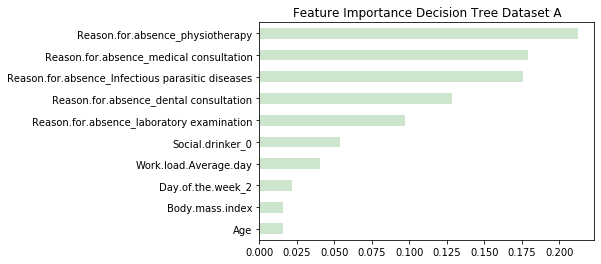

In [41]:
##currently working on this
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth = 6, random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(y_pred[0:5])
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy A: {:.2f}".format(acc))

#B
dtB = DecisionTreeClassifier(max_depth = 6, random_state = 1)
dtB.fit(X_trainb, y_trainb)
y_predb = dtB.predict(X_testb)
print(y_predb[0:5])
y_predb = dtB.predict(X_testb)
accb = accuracy_score(y_testb, y_predb)
print("Test set accuracy B: {:.2f}".format(accb))

#C
dtC = DecisionTreeClassifier(max_depth = 6, random_state = 1)
dtC.fit(X_trainc, y_trainc)
y_predc = dtC.predict(X_testc)
print(y_predc[0:5])
y_predc = dtC.predict(X_testc)
acc_c = accuracy_score(y_testc, y_predc)
print("Test set accuracy C: {:.2f}".format(acc_c))

#Important features Dataset A
importances = pd.Series(data=dt.feature_importances_,
                        index= X_train.columns);
title = 'Feature Importance Decision Tree Dataset A'
importances_sorted = importances.sort_values(ascending=False)[:10];
plot = importances_sorted.plot(kind='barh', color='green', alpha=0.2).invert_yaxis();
plt.title(title);

#### **Logistic Regression**

Set **A has accuracy of 0.87**, Set B has accuracy of 0.82, Set C has accuracy of 0.86. The most important features for Set A are Pet, Social Smoker, Social Drinker, Son. However, one thing to note is that the variables have almost equal importance eventhough they are binary classification features. Something to keep in mind when choosing the final model. 

Test set accuracy A: 0.87
Test set accuracy B: 0.82
Test set accuracy C: 0.86


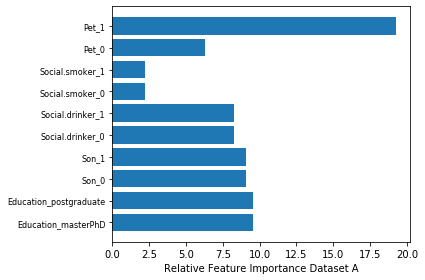

In [42]:
from sklearn.linear_model import  LogisticRegression

#A
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy A: {:.2f}".format(acc))

#B
logregb = LogisticRegression(random_state=1)
logregb.fit(X_trainb, y_trainb)
y_predb = logregb.predict(X_testb)
accb = accuracy_score(y_testb, y_predb)
print("Test set accuracy B: {:.2f}".format(accb))

#C
logregc = LogisticRegression(random_state=1)
logregc.fit(X_trainc, y_trainc)
y_predc = logregc.predict(X_testc)
accc = accuracy_score(y_testc, y_predc)
print("Test set accuracy C: {:.2f}".format(accc))

feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = np.sort(sorted_idx)[::-1][:10]
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx][::-1], fontsize=8)
featax.set_xlabel('Relative Feature Importance Dataset A')
plt.tight_layout();   
plt.show();

<br/>

### **Bagging Classifier**


When using a Bagging Classifier for the Decision Tree, **Dataset C** performs better than Dataset A, scoring **0.87** vs 0.85 respectively. 

In [43]:
#bagging classifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of dataset A using Bagging Classifier is: {:.2f}'.format(acc_test)) 

dtc = DecisionTreeClassifier(random_state=1)
bcc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
bcc.fit(X_trainc, y_trainc)
y_predc = bcc.predict(X_testc)

acc_testc = accuracy_score(y_testc, y_predc)
print('Test set accuracy of dataset C using Bagging Classifier is: {:.2f}'.format(acc_testc)) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

Test set accuracy of dataset A using Bagging Classifier is: 0.85


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

Test set accuracy of dataset C using Bagging Classifier is: 0.87


<br/>

#### **Gradient Boosting Regressor**

Set **A has accuracy of 0.87**, Set C has accuracy of 0.84. The most important features for Set A are Reason for Absence: Physiotherapy, medical consultation, dental consultation. 

Test set accuracy of gb A: 0.87
Test set accuracy of gb C: 0.84


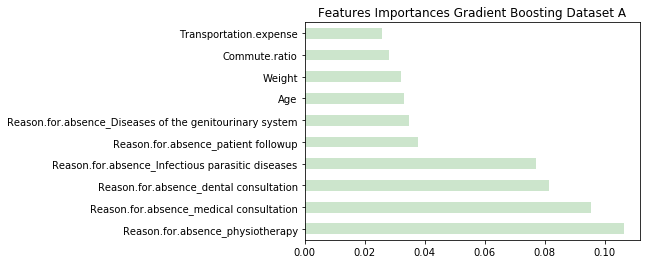

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#A
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test).round()
acc_gb = accuracy_score(y_test, y_pred)
print('Test set accuracy of gb A: {:.2f}'.format(acc_gb))

#C
gbc = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)
gbc.fit(X_trainc, y_trainc)
y_predc = gbc.predict(X_testc).round()
acc_gbc = accuracy_score(y_testc, y_predc)
print('Test set accuracy of gb C: {:.2f}'.format(acc_gbc))

importances = pd.Series(data=gb.feature_importances_,
                        index= X_train.columns)
importances_sorted = importances.sort_values(ascending=False)[:10]
plot = importances_sorted.plot(kind='barh', color='green', alpha=0.2);
plt.title('Features Importances Gradient Boosting Dataset A');

<br/>

# Feature Selection
***

Not all features have the same importance in their ability to predict the desired target variable. So far, the best model for Dataset C is the Decision Tree with Bagging Classifier which increased it's score to 0.87. I will test out Entropy and Gini measurements for a Decision Tree to see what filtering method is more convenient to use for the final model, if Chi-Squared Selection or Information Gain. 


<br/>


### **Decision Tree Classifier Entropy Vs Gini**

I will test if changing the criterion for decision in the Decision Tree Classifier makes a difference in the accuracy score. Since Dataset B has scored below A and C in both prior models, I will only use datasets A and C going forward. **Entropy:** Dataset A scored 0.81, Dataset C scored 0.79. **Gini:** Dataset A scored 0.79, Dataset C scored 0.81. It seems like each criterion benefits a dataset but the difference is minimal. 

In [45]:
#use entropy as info criterion
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Dataset A
dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred)

#Use gini as info criterion
dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=8, random_state=1)
dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred)

print('Accuracy achieved in model A by using entropy: ', accuracy_entropy)
print('Accuracy achieved in model A by using the gini index: ', accuracy_gini)
    
#Dataset C
dt_entropyc = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=1)
dt_entropyc.fit(X_trainc, y_trainc)
y_predc = dt_entropyc.predict(X_testc)
accuracy_entropyc = accuracy_score(y_testc, y_predc)

#Use gini as info criterion
dt_ginic = DecisionTreeClassifier(criterion="gini", max_depth=8, random_state=1)
dt_ginic.fit(X_trainc, y_trainc)
y_predc = dt_ginic.predict(X_testc)
accuracy_ginic = accuracy_score(y_testc, y_predc)

print('Accuracy achieved in model C by using entropy: ', accuracy_entropyc)
print('Accuracy achieved in model C by using the gini index: ', accuracy_ginic)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Accuracy achieved in model A by using entropy:  0.8067226890756303
Accuracy achieved in model A by using the gini index:  0.7899159663865546


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Accuracy achieved in model C by using entropy:  0.7899159663865546
Accuracy achieved in model C by using the gini index:  0.8067226890756303


<br/>

### CHI SQUARED SELECTION

I will now test the **Chi-Squared Selection** method to filter out the features that are not representative enough for the model. The features with Chi Scores in the last quartile of the values will be removed. The **Chisquared Threshold A = 1.55** which increases accuracy to 0.86 for a GradientBoostingRegressor model and to 0.82 for a Bagging Classifier: 0.82, a score slightly lower than without ChiSquared Selection for Dataset A. 

The **ChiSquared Threshold C is 6.22** which increases the model accuracy to 0.84 for both the GradientBoostingRegressor and the Bagging Classifier.

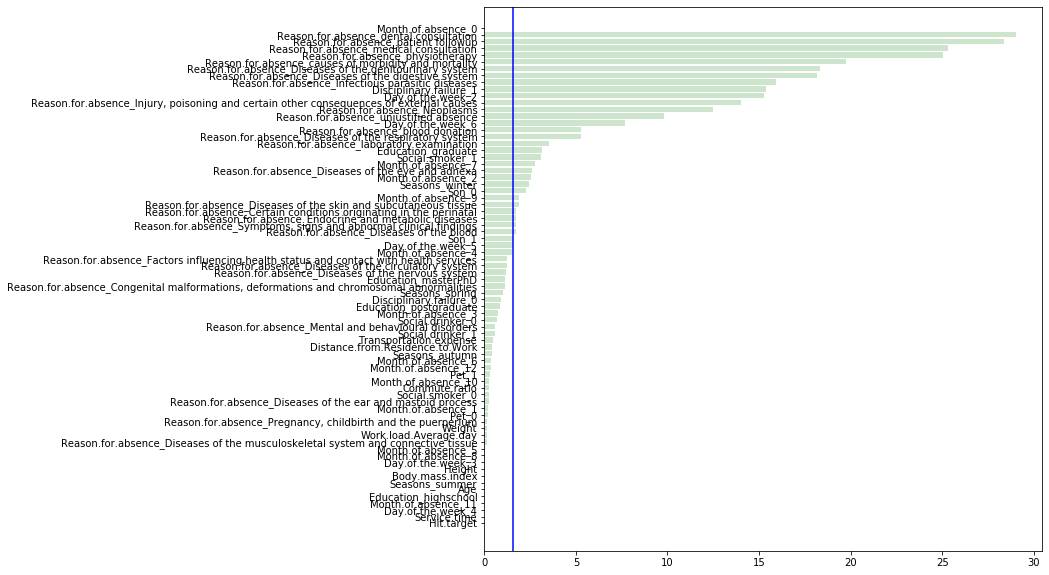

ChiSquared Threshold 1.5542892345602959


In [46]:
from sklearn.feature_selection import SelectKBest, chi2
from operator import itemgetter

#Dataset A
chi2_selector = SelectKBest(score_func=chi2).fit(X_train, y_train)
# Get the indices sorted by most important to least important
indices = np.argsort(chi2_selector.scores_)[::-1];
chi2_features = defaultdict(float)
for i in range(len(X.columns)):
    chi2_features[X.columns[indices[i]]] += chi2_selector.scores_[indices[i]];
items = sorted(chi2_features.items(), key=itemgetter(1), reverse=True);
keys, values = list(zip(*items));

plt.figure(figsize=(10,10));
plt.yticks(list(range(len(keys))), keys, rotation=0, fontsize=10);
plt.barh(list(range(len(keys))), values, color='g', alpha=0.2, align='center');
chi2_th = pd.Series(list(chi2_features.values())).quantile(0.25)*6;
plt.axvline(chi2_th, color='blue');
plt.gca().invert_yaxis();
plt.show();

print("ChiSquared Threshold", chi2_th);


In this figure you can see that the threshold is not a very strict threshold (close to 0), so it is basically removing features that are not related at all to the target variable.

You do not need all of this apparatus to compute the threshold: you can use 0 most of the times at threshold and say that any feature with a Chi-Squared equal to 0 (i.e., not related to the target variable) is not relevant and, consequently, you remove it.

Now, we can test if this a good move, by removing any feature with a Chi Squared test statistic equals to 0.

In [47]:
chi2_features_to_remove = dict(filter(lambda x: x[1] <= chi2_th, chi2_features.items())).keys()

print("Features to remove = {}".format(chi2_features_to_remove))

Features to remove = dict_keys(['Son_1', 'Day.of.the.week_5', 'Month.of.absence_4', 'Reason.for.absence_Factors influencing health status and contact with health services', 'Reason.for.absence_Diseases of the circulatory system', 'Reason.for.absence_Diseases of the nervous system', 'Education_masterPhD', 'Reason.for.absence_Congenital malformations, deformations and chromosomal abnormalities', 'Seasons_spring', 'Disciplinary.failure_0', 'Education_postgraduate', 'Month.of.absence_3', 'Social.drinker_0', 'Reason.for.absence_Mental and behavioural disorders', 'Social.drinker_1', 'Transportation.expense', 'Distance.from.Residence.to.Work', 'Seasons_autumn', 'Month.of.absence_6', 'Month.of.absence_12', 'Pet_1', 'Month.of.absence_10', 'Commute.ratio', 'Social.smoker_0', 'Reason.for.absence_Diseases of the ear and mastoid process', 'Month.of.absence_1', 'Pet_0', 'Reason.for.absence_Pregnancy, childbirth and the puerperium', 'Weight', 'Work.load.Average.day', 'Reason.for.absence_Diseases of t

In [48]:
chi_X = X.drop(list(chi2_features_to_remove), axis=1) 
X_final = X_final.drop(list(chi2_features_to_remove), axis=1)
chi_X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

,Reason.for.absence_Certain conditions originating in the perinatal,Reason.for.absence_Diseases of the blood,Reason.for.absence_Diseases of the digestive system,Reason.for.absence_Diseases of the eye and adnexa,Reason.for.absence_Diseases of the genitourinary system,Reason.for.absence_Diseases of the respiratory system,Reason.for.absence_Diseases of the skin and subcutaneous tissue,Reason.for.absence_Endocrine and metabolic diseases,Reason.for.absence_Infectious parasitic diseases,"Reason.for.absence_Injury, poisoning and certain other consequences of external causes",...,Month.of.absence_2,Month.of.absence_7,Month.of.absence_9,Day.of.the.week_2,Day.of.the.week_6,Seasons_winter,Disciplinary.failure_1,Education_graduate,Son_0,Social.smoker_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CHI_GB IS THE MODEL I PRESENTED ON THE ASSIGNMENT

In [49]:

chi_X = X.drop(list(chi2_features_to_remove), axis=1) 
X_train, X_test, y_train, y_test = train_test_split(chi_X, y, test_size=0.20, random_state=42)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#A
Chi_gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)
Chi_gb.fit(X_train, y_train)
y_pred = Chi_gb.predict(X_test)
y_pred = Chi_gb.predict(X_test).round()
Chi_gb_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy A for Chi Gradient Boosted Tree: {:.2f}".format(Chi_gb_acc))

#bagging classifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=1)
Chi_bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
Chi_bc.fit(X_train, y_train)
y_pred = Chi_bc.predict(X_test)
y_pred = Chi_bc.predict(X_test).round()
Chi_bc_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy A for Chi Bagging Classifier: {:.2f}".format(Chi_bc_acc))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Test set accuracy A for Chi Gradient Boosted Tree: 0.86


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

Test set accuracy A for Chi Bagging Classifier: 0.82


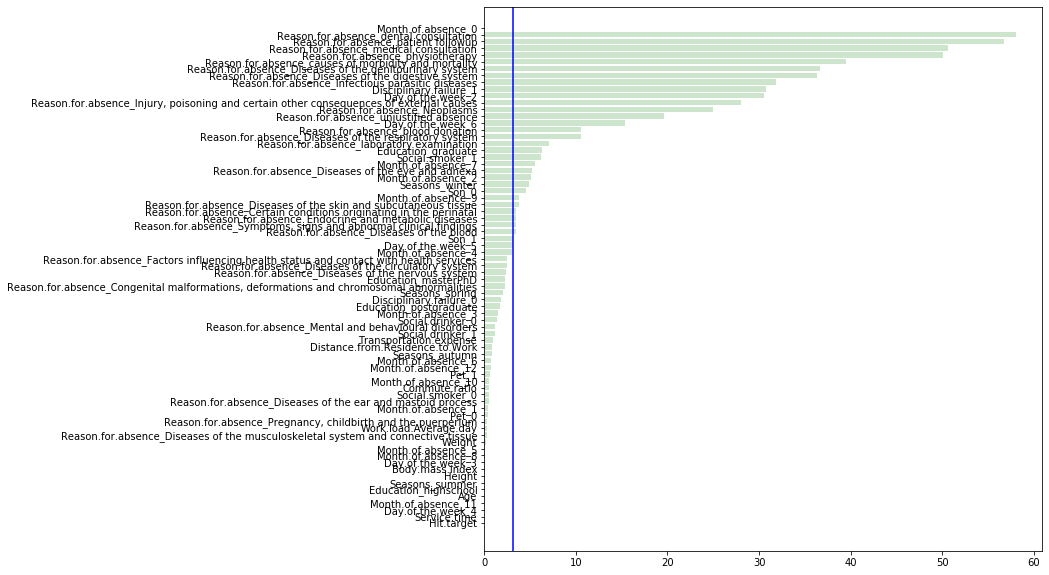

ChiSquared Threshold 3.1085784691205918


In [50]:
from sklearn.feature_selection import SelectKBest, chi2
from operator import itemgetter

#C
chi2_selector = SelectKBest(score_func=chi2).fit(X_trainc, y_trainc)
# Get the indices sorted by most important to least important
indices = np.argsort(chi2_selector.scores_)[::-1];
chi2_featuresC = defaultdict(float)
for i in range(len(Xc.columns)):
    chi2_features[Xc.columns[indices[i]]] += chi2_selector.scores_[indices[i]];
items = sorted(chi2_features.items(), key=itemgetter(1), reverse=True);
keys, values = list(zip(*items));

plt.figure(figsize=(10,10));
plt.yticks(list(range(len(keys))), keys, rotation=0, fontsize=10);
plt.barh(list(range(len(keys))), values, color='g', alpha=0.2, align='center');
chi2_th = pd.Series(list(chi2_features.values())).quantile(0.25)*6;
plt.axvline(chi2_th, color='blue');
plt.gca().invert_yaxis();
plt.show();

print("ChiSquared Threshold", chi2_th);

In [51]:
chi2_features_to_removeC = dict(filter(lambda x: x[1] <= chi2_th, chi2_featuresC.items())).keys()

print("Features to remove = {}".format(chi2_features_to_removeC))

chi_Xc = Xc.drop(list(chi2_features_to_removeC), axis=1) 
chi_Xc

X_train_chiC, X_test_chiC, y_train_chiC, y_test_chiC = train_test_split(Xc, yc, test_size=0.20, random_state=42)

Features to remove = dict_keys([])


,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Work.load.Average.day,Hit.target,Body.mass.index,Commute.ratio,Reason.for.absence_Certain conditions originating in the perinatal,"Reason.for.absence_Congenital malformations, deformations and chromosomal abnormalities",Reason.for.absence_Diseases of the blood,...,Education_masterPhD,Education_postgraduate,Son_0,Son_1,Social.drinker_0,Social.drinker_1,Social.smoker_0,Social.smoker_1,Pet_0,Pet_1
0,0.546154,0.659574,0.521739,0.194471,0.842105,0.578947,0.070996,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.000000,0.170213,0.652174,0.194471,0.842105,0.631579,0.106466,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.234615,0.978723,0.652174,0.194471,0.842105,0.631579,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.546154,0.000000,0.565217,0.194471,0.842105,0.263158,0.927329,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.546154,0.659574,0.521739,0.194471,0.842105,0.578947,0.070996,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.546154,0.255319,0.478261,0.339296,0.631579,0.315789,0.225364,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
589,0.546154,0.659574,0.521739,0.339296,0.631579,0.578947,0.070996,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
590,0.450000,0.127660,0.565217,0.339296,0.631579,0.526316,0.341437,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
591,0.434615,0.638298,0.565217,0.377540,0.736842,0.842105,0.059097,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [52]:
#Chi model Dataset C
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#C
Chi_gbC = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)
Chi_gbC.fit(X_train_chiC, y_train_chiC)
y_pred_chiC = Chi_gbC.predict(X_test_chiC).round()
Chi_tree_acc_chiC = accuracy_score(y_test_chiC, y_pred_chiC)
print("Test set accuracy C for Chi Gradient Boosting Tree: {:.2f}".format(Chi_tree_acc_chiC))

#bagging classifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=1)
Chi_bcC = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
Chi_bcC.fit(X_train_chiC, y_train_chiC)
y_pred = Chi_bcC.predict(X_test_chiC)
y_pred = Chi_bcC.predict(X_test_chiC).round()
Chi_bcc_acc = accuracy_score(y_test_chiC, y_pred_chiC)
print("Test set accuracy C for Chi Bagging Classifier: {:.2f}".format(Chi_bcc_acc))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Test set accuracy C for Chi Gradient Boosting Tree: 0.84


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

Test set accuracy C for Chi Bagging Classifier: 0.84


### HYPERPARAMETERS
***

I Will try Randomized Grid Search Cross Validation to find the ideal set of parameters to use in my final model selection. I am testing Gradient Boosting Regressor and Decision Tree Classifier, still for both Dataset A and C. Not sure why these results of my score for the Gradient Boosting Regressor are shown in the metric  criterion='friedman_mse' with results to 0.42 and 0.41, the current accuracy stands at **0.88 Dataset A** and 0.83. However, for the Decision Tree Classifier the score is 0.82 and 0.83. 

In [53]:
#Randomized Search CV

from scipy.stats import randint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 5, 10],
              "max_features": [3, 5, 10, 15, 20],
              "min_samples_leaf": [3, 5, 10, 15, 20]
              }

# Instantiate a Decision Tree classifier: tree
bgr = GradientBoostingRegressor()

bgr_cv = RandomizedSearchCV(bgr, param_dist, cv=10)
bgr_cv.fit(X_train,y_train)
y_predict = bgr_cv.predict(X_test).round()
acc_bgr_cv = accuracy_score(y_test, y_predict)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(bgr_cv.best_params_))
print("Best score A is {}".format(bgr_cv.best_score_))
print("Accuracy A is {}".format(acc_bgr_cv))

#C
bgr = GradientBoostingRegressor()
bgr_cvc = RandomizedSearchCV(bgr, param_dist, cv=10)
bgr_cvc.fit(X_trainc, y_trainc)
y_predictc = bgr_cvc.predict(X_testc).round()
acc_bgr_cvc = accuracy_score(y_testc, y_predictc)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(bgr_cvc.best_params_))
print("Best score C is {}".format(bgr_cvc.best_score_))
print("Accuracy C is {}".format(acc_bgr_cvc))

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

Tuned Decision Tree Parameters: {'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 3}
Best score A is 0.4198361519978455
Accuracy A is 0.8487394957983193


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

Tuned Decision Tree Parameters: {'min_samples_leaf': 15, 'max_features': 15, 'max_depth': 3}
Best score C is 0.4165071670749829
Accuracy C is 0.8319327731092437


# FINAL MODEL SELECTION

In [60]:
y_predict2 = bgr_cv.predict(X_test).round()
predictions = pd.DataFrame({'ID':test['ID'], 'Absenteeism.time.in.hours':final_pred})
predictions.to_csv("predictions.csv", index=False)